<a href="https://colab.research.google.com/github/Drozeler/Machine-Learning/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from  nltk import pos_tag, ne_chunk
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
text = "I was miserable in my 30s. Then I turned 50, and I've never been happer-here's the No.1 reason why."

In [ ]:
from matplotlib import pyplot as plt

def process_text_and_sentiment_analysis(text):
  text = text.lower()
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  freq_dist = FreqDist(lemmatized_tokens)
  print("Frequency Distribution:")
  print(freq_dist.most_common(5))
  analyzer = SentimentIntensityAnalyzer()
  sentiment_score = analyzer.polarity_scores(text)
  print("\nSentiment Analysis:")
  print(sentiment_score)
  print("\n")

In [ ]:
samples = [
    "EU continues its engagement in global water cooperation at the 10th World Water Forum",
    "Two officers killed in suspected JI attack on Malaysian police station",
    "Raphael Varane linked with shock move to Liga MX side Tigres after announcing Man Utd exit",
    "Premier League: Chelsea, Man Utd, Tottenham and Newcastle in race for European football qualification",
    "Israel's army says three hostages' bodies recovered",
    "Scheffler charged with police officer assault before US PGA round",
    "US confirms first aid trucks arrive via Gaza pier",
    "Study proves black holes have a ‘plunging region,’ just as Einstein predicted",
    "The Mona Lisa was set in this surprising Italian town, geologist claims",
    "The world’s best airline is paying staff a bonus of 8 months’ salary",
]

In [ ]:
for sample in samples:
  print("Processing sample:")
  print(sample)
  process_text_and_sentiment_analysis(sample)

Processing sample:
EU continues its engagement in global water cooperation at the 10th World Water Forum
Frequency Distribution:
[('water', 2), ('eu', 1), ('continues', 1), ('engagement', 1), ('global', 1)]

Sentiment Analysis:
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}


Processing sample:
Two officers killed in suspected JI attack on Malaysian police station
Frequency Distribution:
[('two', 1), ('officer', 1), ('killed', 1), ('suspected', 1), ('ji', 1)]

Sentiment Analysis:
{'neg': 0.543, 'neu': 0.457, 'pos': 0.0, 'compound': -0.8591}


Processing sample:
Raphael Varane linked with shock move to Liga MX side Tigres after announcing Man Utd exit
Frequency Distribution:
[('raphael', 1), ('varane', 1), ('linked', 1), ('shock', 1), ('move', 1)]

Sentiment Analysis:
{'neg': 0.148, 'neu': 0.852, 'pos': 0.0, 'compound': -0.3818}


Processing sample:
Premier League: Chelsea, Man Utd, Tottenham and Newcastle in race for European football qualification
Frequency Distribution:

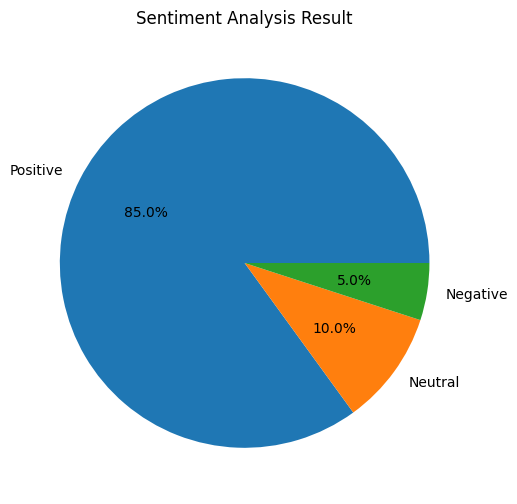

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
text_list = [
    "Economic Growth Surges to Record High as Inflation Remains Remarkably Steady",
    "Global Summit in Geneva Focuses Intensely on Long-Term Climate Change Solutions",
    "Leading Tech Giants Announce Major Breakthrough in Artificial Intelligence Technology",
    "Healthcare Workers Across the Nation Protest for Improved Working Conditions and Pay",
    "New Comprehensive Study Reveals Significant Health Benefits of Plant-Based Diets",
    "Stock Markets Hit Record High Amid Rising Investor Optimism and Economic Stability",
    "Government Introduces Comprehensive New Policies to Address the Growing Housing Crisis",
    "Scientists Announce Discovery of Potential Cure for Previously Incurable Rare Disease",
    "Annual Cultural Festival Celebrates Community Diversity and Promotes Inclusion",
    "Local Communities Rally Together to Provide Aid and Support for Recent Flood Victims",
    "Innovative Breakthrough in Renewable Energy Technology Promises Sustainable Future",
    "Education Reform Bill Passed to Significantly Improve Public School Funding Nationwide",
    "Wildlife Conservation Efforts Lead to a Notable Increase in Endangered Species Populations",
    "City Launches Ambitious New Initiative to Significantly Reduce Traffic Congestion",
    "Upcoming Art Exhibit to Showcase Stunning Works by Emerging Contemporary Artists",
    "National Sports Teams Prepare Intensively for the Highly Anticipated Championship Season",
    "Innovative New App Aims to Completely Revolutionize Personal Finance Management",
    "Major Retailer Announces Plans to Expand to International Markets Amid Growing Demand",
    "Celebrity Chef Opens New High-End Restaurant in the Heart of Downtown",
    "Historic Landmark to Undergo Major Renovations to Preserve Its Cultural Heritage",
]

positive_count = 0
neutral_count = 0
negative_count = 0

for text in text_list:
  sentiment_score = sia.polarity_scores(text)['compound']
  if sentiment_score > 0.05:
    positive_count += 1
  elif sentiment_score < -0.05:
    negative_count += 1
  else:
    neutral_count += 1

plt.figure(figsize=(8,6))
plt.pie([positive_count, neutral_count, negative_count], labels=['Positive', 'Neutral', 'Negative'], autopct = '%1.1f%%')
plt.title('Sentiment Analysis Result')
plt.show()